In [1]:
import networkx as nx
%matplotlib inline

In [2]:
M=nx.read_gml("polblogs.gml")

In [3]:
# create weighted graph from M
G = nx.Graph()
for u,v,data in M.edges_iter(data=True):
    if G.has_edge(u,v):
        G[u][v]['weight'] += 1
    else:
        G.add_edge(u, v, weight=1)

### 1.  Create a nice looking graph of the political blog network

In [5]:
import matplotlib.pyplot as plt

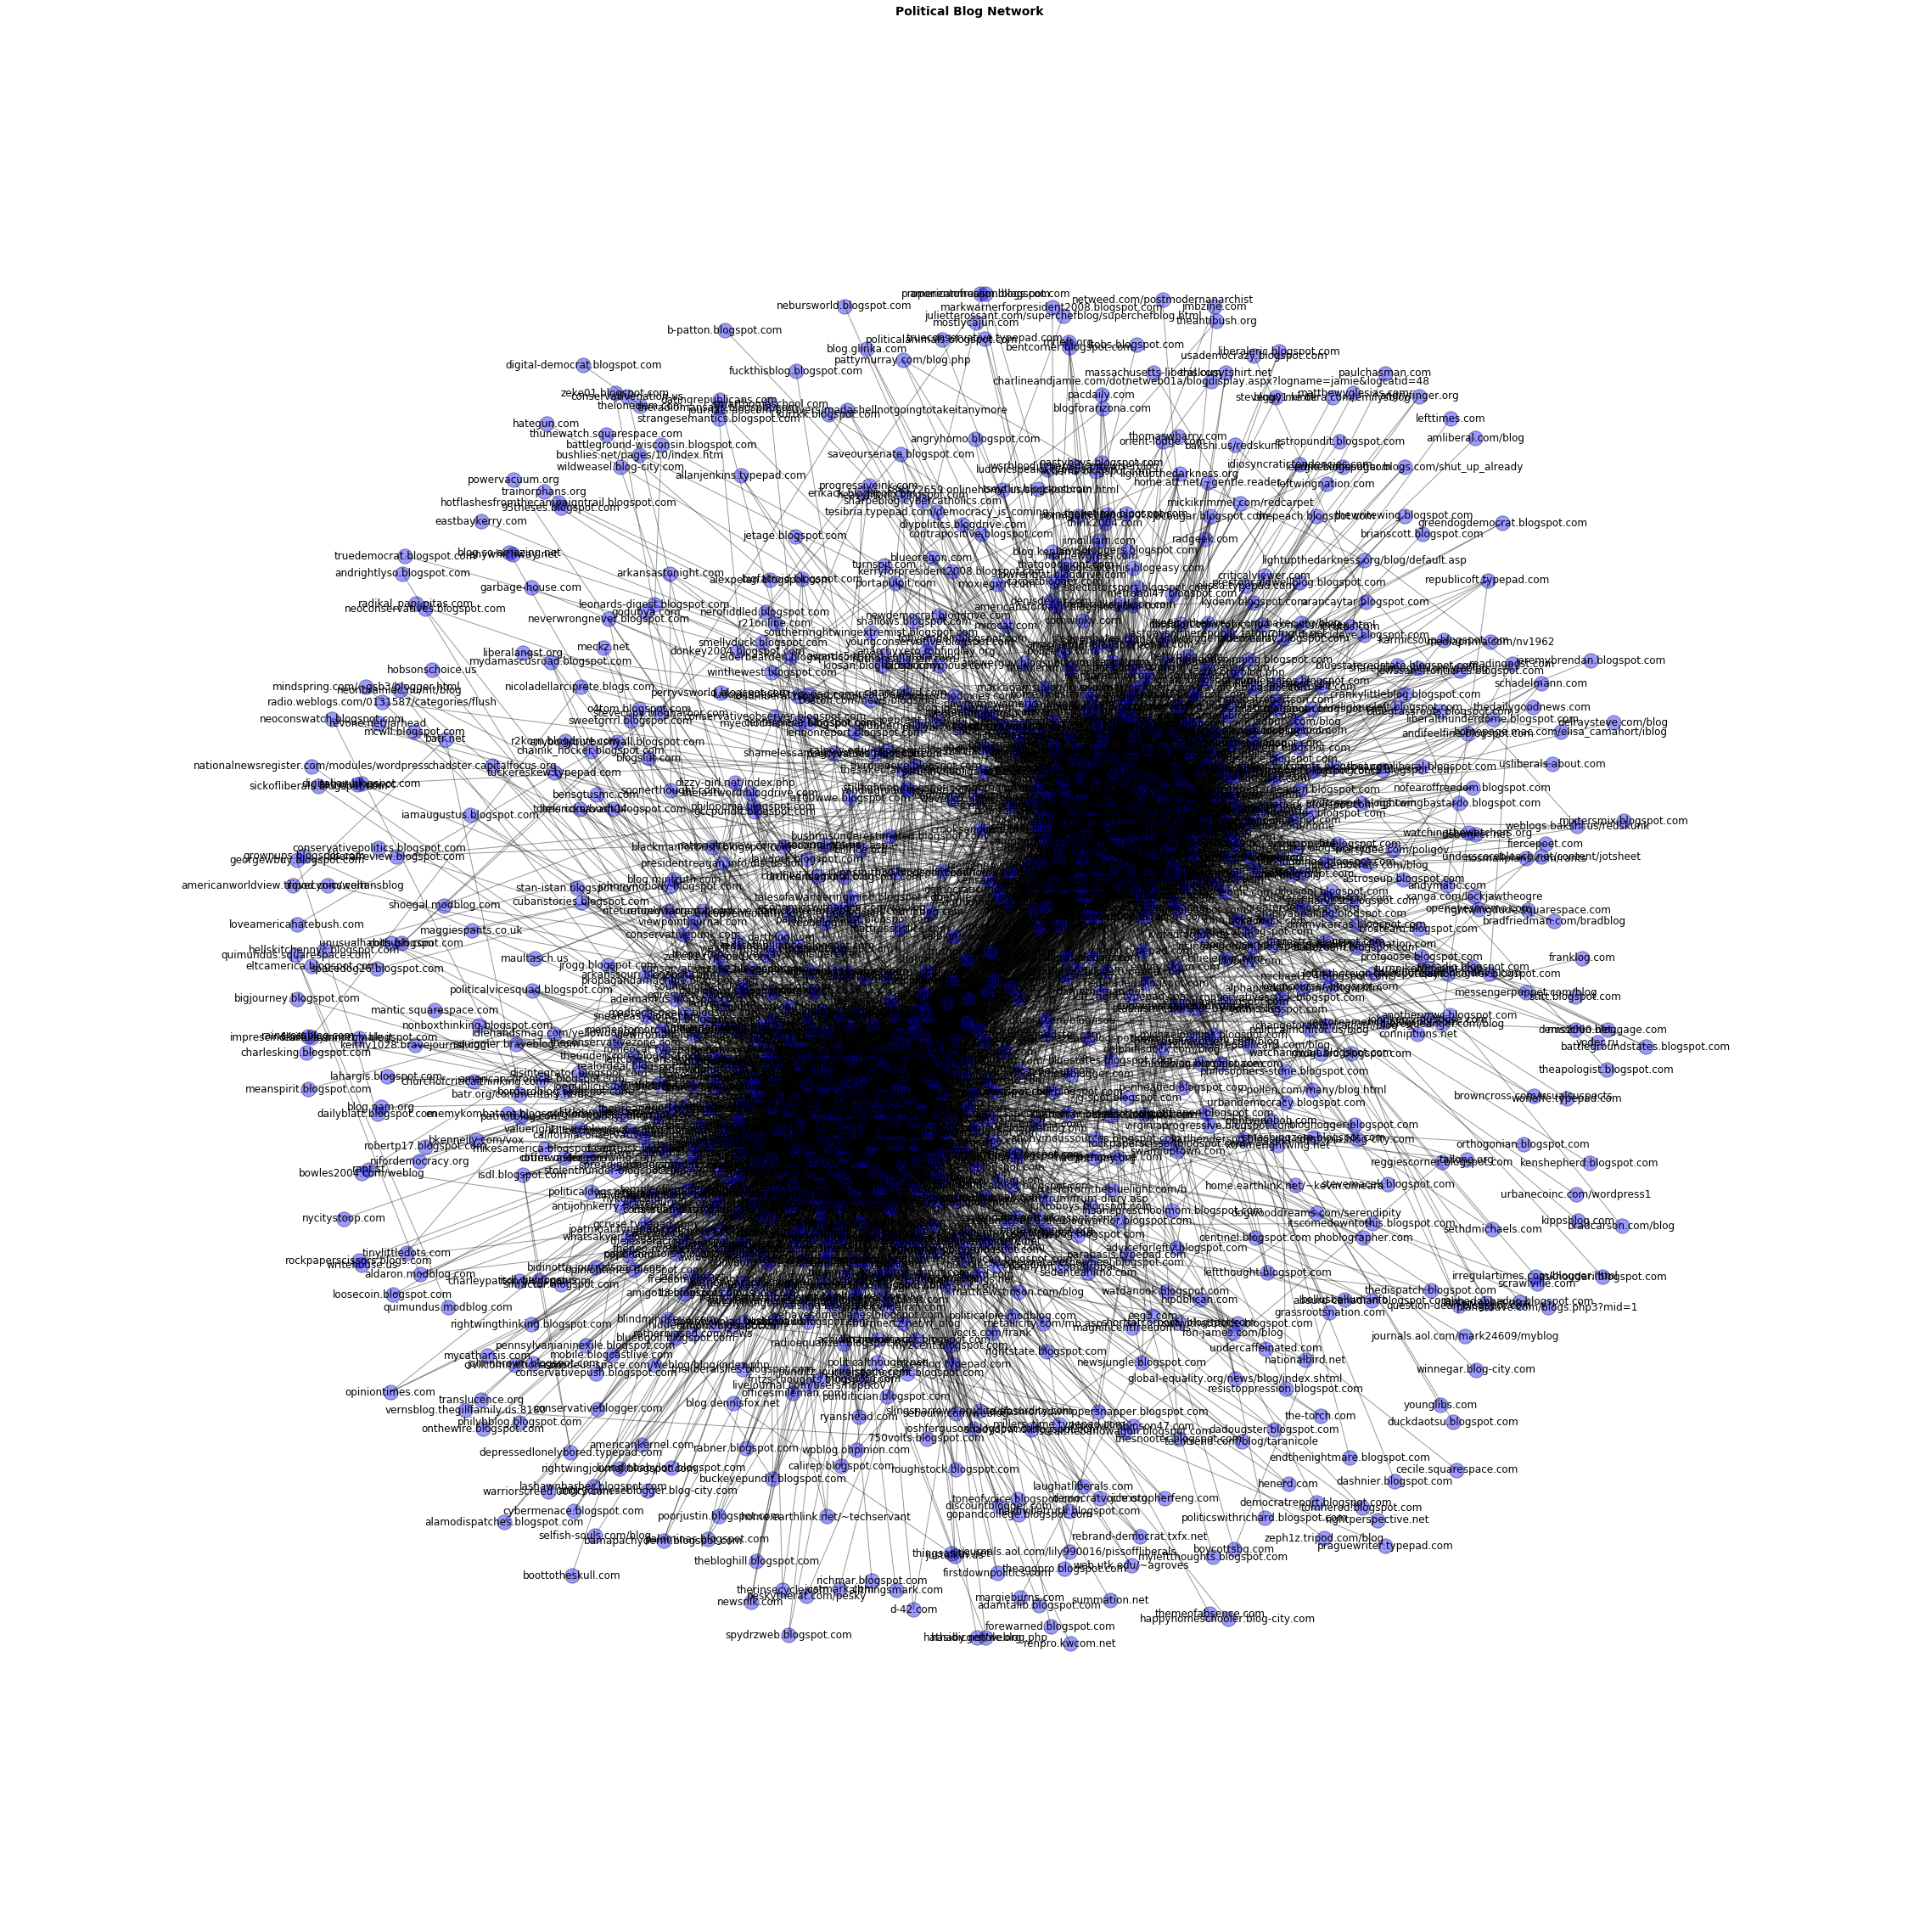

In [21]:
plt.figure(figsize=(40,40))
pos=nx.spring_layout(G, iterations=50, scale=5, k=.3)
nx.draw_networkx_labels(G,pos,fontsize=8)
font = {'fontname'   : 'Helvetica',
            'color'      : 'k',
            'fontweight' : 'bold',
            'fontsize'   : 14}
plt.title("Political Blog Network", font)


nx.draw_networkx_nodes(G,pos,node_color='b',alpha=0.4)
nx.draw_networkx_edges(G,pos,alpha=0.4,node_size=0,width=1,edge_color='k')
plt.axis('off')
plt.show()

### 2.  What are the 10 most influential blogs?

In [22]:
centrality=nx.eigenvector_centrality(G)

In [23]:
blog_list = []
for node in centrality:
    blog_list.append((node,centrality[node]))

In [24]:
sorted(blog_list, key=lambda x: x[1], reverse=True)[0:10]

[(u'atrios.blogspot.com', 0.1948079793663771),
 (u'dailykos.com', 0.1608974020523483),
 (u'washingtonmonthly.com', 0.14653924259836879),
 (u'digbysblog.blogspot.com', 0.14264369221718307),
 (u'bodyandsoul.typepad.com', 0.14113489174330363),
 (u'liberaloasis.com', 0.1395237157110787),
 (u'tbogg.blogspot.com', 0.13703641699824257),
 (u'corrente.blogspot.com', 0.12941759274096148),
 (u'talkingpointsmemo.com', 0.12700519780790956),
 (u'dneiwert.blogspot.com', 0.12237564692546016)]

### 3.  What are the 10 least influential blogs?



In [25]:
sorted(blog_list, key=lambda x: x[1], reverse=False)[0:10]

[(u'thelonedem.com', 1.776325109755965e-72),
 (u'digital-democrat.blogspot.com', 1.776325109755965e-72),
 (u'americanworldview.tripod.com/weltansblog', 7.491540638916242e-09),
 (u'quimundus.modblog.com', 6.682929975006484e-08),
 (u'batr.org/commentary.html', 6.795517611554005e-07),
 (u'batr.net', 6.796325594929459e-07),
 (u'democratvoice.org', 1.0233388204113296e-06),
 (u'quimundus.squarespace.com', 6.061741218869531e-06),
 (u'massachusetts-liberal.com', 9.483365235734505e-06),
 (u'thingsasitis.net', 1.1736249650658606e-05)]

### 4.  Answer this question for both left wing and right wing blogs seperately.  (Optional 10 Extra Credit Points)

In [29]:
sub_graphs = nx.connected_component_subgraphs(G)
n = nx.number_connected_components(G)

In [30]:
n

2

In [33]:
nx.average_clustering(G)

0.319709294872626

In [38]:
print nx.connected_components(G)

<generator object connected_components at 0x000000000B943360>


In [36]:
def girvan_newman (G):

    if len(G.nodes()) == 1:
        return [G.nodes()]

    def find_best_edge(G0):
        """
        Networkx implementation of edge_betweenness
        returns a dictionary. Make this into a list,
        sort it and return the edge with highest betweenness.
        """
        eb = nx.edge_betweenness_centrality(G0)
        eb_il = eb.items()
        eb_il.sort(key=lambda x: x[1], reverse=True)
        return eb_il[0][0]

    components = nx.connected_component_subgraphs(G)

    while len(components) == 1:
        G.remove_edge(*find_best_edge(G))
        components = nx.number_connected_components(G)

    result = [c.nodes() for c in components]

    for c in components:
        result.extend(girvan_newman(c))

    return result

In [45]:
G_ud = G.to_undirected()

In [47]:
print nx.clustering(G_ud, 1)

NetworkXError: nbunch is not a node or a sequence of nodes.